<a href="https://colab.research.google.com/github/estebanhernandezr/Entregas-Semanales/blob/main/Copia_de_AndreyEsteban_LizarazoHernandez_proyecto4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ejecutar** la siguiente celda para **actualizar** la versión de **excel** de python y poder leer los archivos **.csv**.

In [1]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install --upgrade xlrd 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Ejecutar** la siguiente celda para **importar** las **librerias** necesarias para el desarrollo de este proyecto.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import preprocessing
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.utils import resample
from keras import models
from keras import layers
from keras import regularizers
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers

**Ejecutar** la siguiente celda para **definir** las **rutas** hacia la ubicación de los archivos **.csv**.

**Modificar** estas rutas para **cambiar** los conjuntos de **datos**.

In [4]:
marketing_campaign_info_path = '/content/bank-full.csv'

**Ejecutar** la siguiente celda para **declarar** algunas **funciones** que ayudan a **visualizar** el conjunto de **datos**.

In [5]:
def stackedbar_dataframe(dataframe, col1, col2, norm=True):
    frames = []
    for i in pd.DataFrame(dataframe[col1].value_counts()).index.values.tolist():
        row = pd.DataFrame(dataframe.loc[dataframe[col1] == i][col2].value_counts()).T
        frames.append(row)
    df = pd.concat(frames)
    df = df.set_index([pd.DataFrame(dataframe[col1].value_counts()).index.values.tolist()])
    if norm:
        df = df.div(df.sum(axis=1), axis=0)
    return df

def means_dataframe(dataframe, col1, col2):
    frames = []
    for i in pd.DataFrame(dataframe[col1].value_counts()).index.values.tolist():
        row = pd.DataFrame(dataframe.loc[dataframe[col1] == i][col2].value_counts()).T
        row1 = row.mul(row.columns, fill_value=0)
        row1 = pd.DataFrame(row1.sum(axis = 1)/row.sum(axis = 1))
        frames.append(row1)
    df = pd.concat(frames)
    df = df.set_index([pd.DataFrame(dataframe[col1].value_counts()).index.values.tolist()])
    return df

def plot_stackedbar_chart(dataframe, col1, col2, norm=False):
    df = stackedbar_dataframe(dataframe, col1, col2, norm)
    title = 'Frecuencia de aparición absoluta'
    if norm:
        title = 'Frecuencia de aparición relativa'
    df.plot(kind = 'barh', stacked = True, title = title, mark_right = True)

def plot_mean_chart(dataframe, col1, col2):
    df = means_dataframe(dataframe, col1, col2)
    df.plot(kind = 'barh', title = 'Promedio', mark_right = True)

**Ejecutar** la siguiente celda para **cargar** los datos en un **dataframe** de pandas.

In [6]:
marketing_campaign_info = pd.read_csv(marketing_campaign_info_path, delimiter=';')

## **Visualización de los datos**

**Descripción de los datos:**

Campañas de marketing para una entidad bancaria portuguesa. Las campañas de marketing se basaron en llamadas telefónicas.

Cada fila corresponde a la descripción de la persona encuestada durante la llamada.


In [7]:
marketing_campaign_info

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


De las columnas del dataframe, las columnas: contact , day, month y duration describen el estado de la llamada.

A continuación, **visualizamos** la **distribución** de **edad** de las personas **encuestadas**.

In [8]:
marketing_campaign_info['age'].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [9]:
marketing_campaign_info['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

El **promedio** de **edad** de la persona **encuestada** es de **40 años**: la persona **más joven** encuestada tiene **18 años** y **la mayor** tiene **95 años**. El **75 porciento** de las personas **encuestadas** es **menor** de **50 años**.

¿Cuál es la cantidad de personas que subscribieron un depósito a término por rangos de edad?

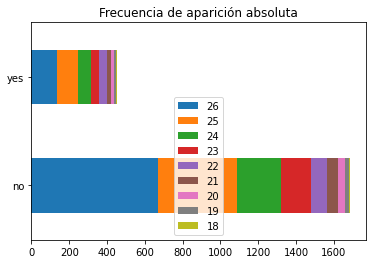

In [10]:
plot_stackedbar_chart(marketing_campaign_info[(marketing_campaign_info["age"] >= 18) & (marketing_campaign_info["age"] <= 26)], 'y', 'age', norm=False)

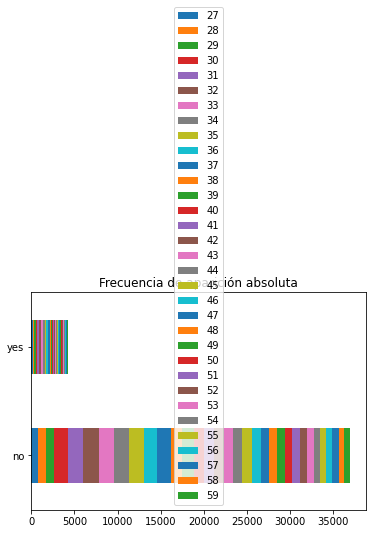

In [11]:
plot_stackedbar_chart(marketing_campaign_info[(marketing_campaign_info["age"] >= 27) & (marketing_campaign_info["age"] <= 59)], 'y', 'age')

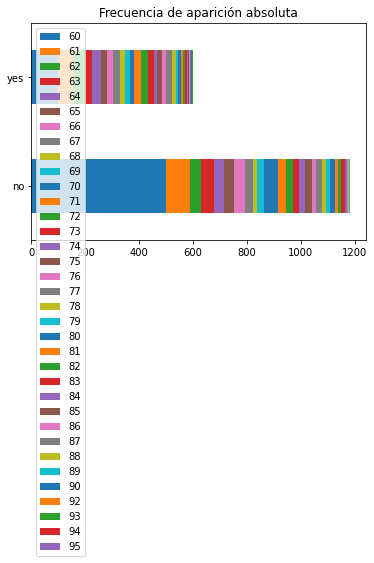

In [12]:
plot_stackedbar_chart(marketing_campaign_info[(marketing_campaign_info["age"] >= 60)], 'y', 'age')

Además, en la gráfica anterior, podemos notar que el promedio de edad en la proporción de personas que subscriben, o no, un depósito a plazo es muy similar: es poco factible predecir con éxito la suscripción a un deposito a plazo en base a la edad de la persona.

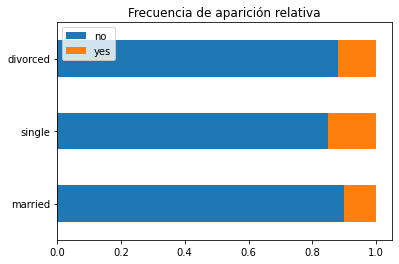

In [13]:
plot_stackedbar_chart(marketing_campaign_info, 'marital', 'y', norm=True)

**Variando** el **parámetro** ***norm*** en la función ***plot_stackedbar_chart($\cdot$)***, que generó la gráfica anterior para **marital** y la **suscripción a un depósito a plazo**, podemos inferir varias cosas:

1.   Solo se tienen registros de personas con alguno de los estados civiles: divorciado, soltero y casado. El estado civil del cual se tienen más registros es el de personas casadas, y del que menos: personas divorciadas.
2.   La mayor cantidad de suscripciones a un depósito a plazo, en términos absolutos, se presentan en el grupo de personas con estado civil de casadas, aunque la proporción, relativa, es similar a la de los otros dos estados civiles, con aproximadamente un 15 porciento de las personas de cada grupo: es poco factible predecir con éxito la suscripción a un deposito a plazo en base al estado civil de la persona.



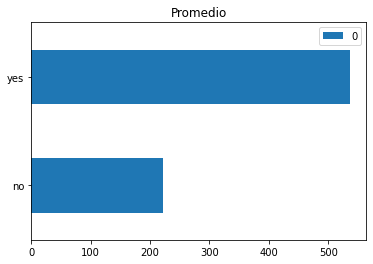

In [14]:
plot_mean_chart(marketing_campaign_info, 'y', 'duration')

## **Pre-procesamiento de los datos**

Este **pre-procesamiento** de los datos consiste en **convertir** las categorias **cualitativas** en **cuantitativas** en cada columna para poder medir las **distancias** en el modelo de **k-means**.

Como en este caso dond

In [15]:
encoder = OrdinalEncoder(categories=[pd.DataFrame(marketing_campaign_info['education'].value_counts()).index.values.tolist()])
print(encoder)
encoder.fit(marketing_campaign_info[["education"]])
marketing_campaign_info['education'] = encoder.transform(marketing_campaign_info[["education"]])

OrdinalEncoder(categories=[['secondary', 'tertiary', 'primary', 'unknown']])


In [16]:
encoder = OrdinalEncoder(categories=[pd.DataFrame(marketing_campaign_info['marital'].value_counts()).index.values.tolist()])
print(encoder)
encoder.fit(marketing_campaign_info[['marital']])
marketing_campaign_info['marital'] = encoder.transform(marketing_campaign_info[["marital"]])
marketing_campaign_info

OrdinalEncoder(categories=[['married', 'single', 'divorced']])


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,0.0,1.0,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,1.0,0.0,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,0.0,0.0,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,0.0,3.0,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,1.0,3.0,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,0.0,1.0,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,2.0,2.0,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,0.0,0.0,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,0.0,0.0,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [17]:
dummies = pd.get_dummies(marketing_campaign_info['job'], drop_first = True)
marketing_campaign_info = pd.concat([marketing_campaign_info, dummies], axis=1)
marketing_campaign_info = marketing_campaign_info.drop(columns=['job'])

In [18]:
encoder = OrdinalEncoder(categories=[pd.DataFrame(marketing_campaign_info['default'].value_counts()).index.values.tolist()])
print(encoder)
encoder.fit(marketing_campaign_info[['default']])
marketing_campaign_info['default'] = encoder.transform(marketing_campaign_info[["default"]])
marketing_campaign_info

OrdinalEncoder(categories=[['no', 'yes']])


,age,marital,education,default,balance,housing,loan,contact,day,month,...,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,58,0.0,1.0,0.0,2143,yes,no,unknown,5,may,...,0,0,1,0,0,0,0,0,0,0
1,44,1.0,0.0,0.0,29,yes,no,unknown,5,may,...,0,0,0,0,0,0,0,1,0,0
2,33,0.0,0.0,0.0,2,yes,yes,unknown,5,may,...,1,0,0,0,0,0,0,0,0,0
3,47,0.0,3.0,0.0,1506,yes,no,unknown,5,may,...,0,0,0,0,0,0,0,0,0,0
4,33,1.0,3.0,0.0,1,no,no,unknown,5,may,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0.0,1.0,0.0,825,no,no,cellular,17,nov,...,0,0,0,0,0,0,0,1,0,0
45207,71,2.0,2.0,0.0,1729,no,no,cellular,17,nov,...,0,0,0,1,0,0,0,0,0,0
45208,72,0.0,0.0,0.0,5715,no,no,cellular,17,nov,...,0,0,0,1,0,0,0,0,0,0
45209,57,0.0,0.0,0.0,668,no,no,telephone,17,nov,...,0,0,0,0,0,0,0,0,0,0


In [19]:
encoder = OrdinalEncoder(categories=[pd.DataFrame(marketing_campaign_info['housing'].value_counts()).index.values.tolist()])
print(encoder)
encoder.fit(marketing_campaign_info[['housing']])
marketing_campaign_info['housing'] = encoder.transform(marketing_campaign_info[["housing"]])
marketing_campaign_info

OrdinalEncoder(categories=[['yes', 'no']])


,age,marital,education,default,balance,housing,loan,contact,day,month,...,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,58,0.0,1.0,0.0,2143,0.0,no,unknown,5,may,...,0,0,1,0,0,0,0,0,0,0
1,44,1.0,0.0,0.0,29,0.0,no,unknown,5,may,...,0,0,0,0,0,0,0,1,0,0
2,33,0.0,0.0,0.0,2,0.0,yes,unknown,5,may,...,1,0,0,0,0,0,0,0,0,0
3,47,0.0,3.0,0.0,1506,0.0,no,unknown,5,may,...,0,0,0,0,0,0,0,0,0,0
4,33,1.0,3.0,0.0,1,1.0,no,unknown,5,may,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0.0,1.0,0.0,825,1.0,no,cellular,17,nov,...,0,0,0,0,0,0,0,1,0,0
45207,71,2.0,2.0,0.0,1729,1.0,no,cellular,17,nov,...,0,0,0,1,0,0,0,0,0,0
45208,72,0.0,0.0,0.0,5715,1.0,no,cellular,17,nov,...,0,0,0,1,0,0,0,0,0,0
45209,57,0.0,0.0,0.0,668,1.0,no,telephone,17,nov,...,0,0,0,0,0,0,0,0,0,0


In [20]:
encoder = OrdinalEncoder(categories=[pd.DataFrame(marketing_campaign_info['loan'].value_counts()).index.values.tolist()])
print(encoder)
encoder.fit(marketing_campaign_info[['loan']])
marketing_campaign_info['loan'] = encoder.transform(marketing_campaign_info[['loan']])
marketing_campaign_info

OrdinalEncoder(categories=[['no', 'yes']])


,age,marital,education,default,balance,housing,loan,contact,day,month,...,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,58,0.0,1.0,0.0,2143,0.0,0.0,unknown,5,may,...,0,0,1,0,0,0,0,0,0,0
1,44,1.0,0.0,0.0,29,0.0,0.0,unknown,5,may,...,0,0,0,0,0,0,0,1,0,0
2,33,0.0,0.0,0.0,2,0.0,1.0,unknown,5,may,...,1,0,0,0,0,0,0,0,0,0
3,47,0.0,3.0,0.0,1506,0.0,0.0,unknown,5,may,...,0,0,0,0,0,0,0,0,0,0
4,33,1.0,3.0,0.0,1,1.0,0.0,unknown,5,may,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0.0,1.0,0.0,825,1.0,0.0,cellular,17,nov,...,0,0,0,0,0,0,0,1,0,0
45207,71,2.0,2.0,0.0,1729,1.0,0.0,cellular,17,nov,...,0,0,0,1,0,0,0,0,0,0
45208,72,0.0,0.0,0.0,5715,1.0,0.0,cellular,17,nov,...,0,0,0,1,0,0,0,0,0,0
45209,57,0.0,0.0,0.0,668,1.0,0.0,telephone,17,nov,...,0,0,0,0,0,0,0,0,0,0


In [21]:
encoder = OrdinalEncoder(categories=[pd.DataFrame(marketing_campaign_info['poutcome'].value_counts()).index.values.tolist()])
print(encoder)
encoder.fit(marketing_campaign_info[['poutcome']])
marketing_campaign_info['poutcome'] = encoder.transform(marketing_campaign_info[['poutcome']])
marketing_campaign_info

OrdinalEncoder(categories=[['unknown', 'failure', 'other', 'success']])


,age,marital,education,default,balance,housing,loan,contact,day,month,...,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,58,0.0,1.0,0.0,2143,0.0,0.0,unknown,5,may,...,0,0,1,0,0,0,0,0,0,0
1,44,1.0,0.0,0.0,29,0.0,0.0,unknown,5,may,...,0,0,0,0,0,0,0,1,0,0
2,33,0.0,0.0,0.0,2,0.0,1.0,unknown,5,may,...,1,0,0,0,0,0,0,0,0,0
3,47,0.0,3.0,0.0,1506,0.0,0.0,unknown,5,may,...,0,0,0,0,0,0,0,0,0,0
4,33,1.0,3.0,0.0,1,1.0,0.0,unknown,5,may,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0.0,1.0,0.0,825,1.0,0.0,cellular,17,nov,...,0,0,0,0,0,0,0,1,0,0
45207,71,2.0,2.0,0.0,1729,1.0,0.0,cellular,17,nov,...,0,0,0,1,0,0,0,0,0,0
45208,72,0.0,0.0,0.0,5715,1.0,0.0,cellular,17,nov,...,0,0,0,1,0,0,0,0,0,0
45209,57,0.0,0.0,0.0,668,1.0,0.0,telephone,17,nov,...,0,0,0,0,0,0,0,0,0,0


In [22]:
encoder = OrdinalEncoder(categories=[pd.DataFrame(marketing_campaign_info['y'].value_counts()).index.values.tolist()])
print(encoder)
encoder.fit(marketing_campaign_info[['y']])
marketing_campaign_info['y'] = encoder.transform(marketing_campaign_info[['y']])
marketing_campaign_info

OrdinalEncoder(categories=[['no', 'yes']])


,age,marital,education,default,balance,housing,loan,contact,day,month,...,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,58,0.0,1.0,0.0,2143,0.0,0.0,unknown,5,may,...,0,0,1,0,0,0,0,0,0,0
1,44,1.0,0.0,0.0,29,0.0,0.0,unknown,5,may,...,0,0,0,0,0,0,0,1,0,0
2,33,0.0,0.0,0.0,2,0.0,1.0,unknown,5,may,...,1,0,0,0,0,0,0,0,0,0
3,47,0.0,3.0,0.0,1506,0.0,0.0,unknown,5,may,...,0,0,0,0,0,0,0,0,0,0
4,33,1.0,3.0,0.0,1,1.0,0.0,unknown,5,may,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0.0,1.0,0.0,825,1.0,0.0,cellular,17,nov,...,0,0,0,0,0,0,0,1,0,0
45207,71,2.0,2.0,0.0,1729,1.0,0.0,cellular,17,nov,...,0,0,0,1,0,0,0,0,0,0
45208,72,0.0,0.0,0.0,5715,1.0,0.0,cellular,17,nov,...,0,0,0,1,0,0,0,0,0,0
45209,57,0.0,0.0,0.0,668,1.0,0.0,telephone,17,nov,...,0,0,0,0,0,0,0,0,0,0


In [23]:
marketing_campaign_info_copy = marketing_campaign_info.drop(columns=['balance', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays'])

# **Modelo de k-means**

A continuación, guardamos una copia del conjunto de datos: el conjunto de datos se repartirá de manera aleatoria varias veces durante el **Cross Validation**. Separamos los regresores y la variable objetivo en dos dataframes diferentes.

In [24]:
X = marketing_campaign_info_copy.loc[:, marketing_campaign_info_copy.columns != 'y']
y = marketing_campaign_info_copy.iloc[:, marketing_campaign_info_copy.columns == 'y']

In [49]:
X = pd.get_dummies(X)
y = pd.get_dummies(y)

X.columns
X = X.drop(['default_no'], axis= 1)
X = X.rename(columns = {'default_yes': 'default'})
y.columns
y = y.drop(['yes'], axis=1)
y = y.rename(columns= {'no': 'y'})

bins = range(0, 100, 10)
ax = sns.distplot(marketing_campaign_info_copy.age[marketing_campaign_info_copy.y=='yes'],
              color='red', kde=False, bins=bins, label='Have Subscribed')
sns.distplot(marketing_campaign_info_copy.age[marketing_campaign_info_copy.y=='no'],
         ax=ax,  # Overplots on first plot
         color='blue', kde=False, bins=bins, label="Haven't Subscribed")
plt.legend()
plt.show

KeyError: ignored

In [50]:
y.value_counts()

y  
0.0    39922
1.0     5289
dtype: int64

A continuación, definimos algunas **funcionalidades** necesarias para realizar el **Cross Validation** para distintos valores de los **parámetros** del modelo de **k-means**.

In [25]:
# Nice function to calculate and visualize the confusion matrix
def plotCM(ytrue, ypred, labels, verbose=True):
    CM = confusion_matrix(ytrue, ypred)
    if verbose:
        ax = sns.heatmap(CM, annot=True, cmap='Blues')

        ax.set_title('Seaborn Confusion Matrix with labels\n\n');
        ax.set_xlabel('\nPredicted Values')
        ax.set_ylabel('Actual Values ');

        ax.xaxis.set_ticklabels(labels)
        ax.yaxis.set_ticklabels(labels)

        ## Display the visualization of the Confusion Matrix.
        plt.show()
    return CM

def plotCentroids(kmeans_model):
    # Prediciendo lso grupos
    C = kmeans_model.cluster_centers_

    plt.figure()
    sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='name', data=df_comple, alpha=0.6);
    plt.scatter(C[:, 0], C[:, 1], marker='x', c='black', s=70)
    plt.show()

def calculate_accuracy(CM):
    tn, fp, fn, tp = CM.ravel()
    accuracy = (tn+tp)/(tn+fp+fn+tp)
    return accuracy

def calculate_precission(CM):
    tn, fp, fn, tp = CM.ravel()
    precission = tp/(tp+fp)
    return precission

def calculate_sensibility(CM):
    tn, fp, fn, tp = CM.ravel()
    sensibility = tp/(tp+fn)
    return sensibility

def calculate_specificity(CM):
    tn, fp, fn, tp = CM.ravel()
    specificity = tn/(tn+fp)
    return specificity

def calculate_FPP(CM):
    tn, fp, fn, tp = CM.ravel()
    FPP = fp/(tn+fp)
    return FPP

def generate_kmeans_model(n, X_param, y_param):
    kmeans_model = KMeans(n_clusters=n, random_state=10)
    kmeans_model.fit(X_param)
    return kmeans_model

def predict_class(model, X_test, y_test, label):
    y_pred = model.predict(X_test)
    y_pred = [1 if x == label else 0 for x in y_pred]
    y_test_local = [1 if x == label else 0 for x in y_test]
    return y_pred

def plotCM_class(model, X_test, y_test, label, verbose=True):
    lista = []
    for index, row in y_test.iterrows():
        lista.append(row['y'])
    CM = plotCM(lista, predict_class(model, X_test, y_test, label), [0, 1], verbose)
    return CM

def cross_validate_kmeans(N, label):
    for n in range(1, N):
        print('generating k means model with hyper-parameters: ', n)
        kf = KFold(n_splits=10) 
        kf.get_n_splits(X)
        history_validation = pd.DataFrame()
        for train_index, test_index in kf.split(X):
            X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            model = generate_kmeans_model(n, X_train, y_train)
            matriz_confusion = plotCM_class(model, X_test, y_test, label, False)
            exactitud = calculate_accuracy(matriz_confusion)
            precision = calculate_precission(matriz_confusion)
            sensibilidad = calculate_sensibility(matriz_confusion)
            especificidad = calculate_specificity(matriz_confusion)
            PFP = calculate_FPP(matriz_confusion)
            pd_validation = pd.DataFrame(data={
                'exact': exactitud,
                'prec': precision,
                'sens': sensibilidad,
                'espec': especificidad,
                'FPP': PFP
            }, index = [n])

            history_validation = pd.concat(objs=[history_validation, pd_validation])
        print('Cross validation measures with hyper-parameters: ', n)
        print(history_validation.mean(axis = 0))

Realizamos **Cross Validation** sobre el conjunto de **datos de entrenamiento** variando el **número de clusters** entre $1$ y $N$.

In [26]:
#cross_validate_kmeans(3, 0.0)

A continuación, **escogemos** el **modelo** de **k-means** **óptimo** de acuerdo a las medidas de **correctitud** extraidas de su **matríz de confusión**. Para este modelo, **graficamos** su **matríz** de confusión e **imprimimos** las **medidas** que caracterizan esta matríz.

(30291, 19)
Epoch 1/100
237/237 [==============================] - 3s 7ms/step - loss: 0.3450 - accuracy: 0.8866 - val_loss: 0.4254 - val_accuracy: 0.8534
Epoch 2/100
237/237 [==============================] - 1s 5ms/step - loss: 0.3303 - accuracy: 0.8892 - val_loss: 0.3521 - val_accuracy: 0.8855
Epoch 3/100
237/237 [==============================] - 1s 5ms/step - loss: 0.3273 - accuracy: 0.8896 - val_loss: 0.3227 - val_accuracy: 0.8916
Epoch 4/100
237/237 [==============================] - 1s 5ms/step - loss: 0.3258 - accuracy: 0.8900 - val_loss: 0.3226 - val_accuracy: 0.8911
Epoch 5/100
237/237 [==============================] - 1s 5ms/step - loss: 0.3227 - accuracy: 0.8896 - val_loss: 0.3248 - val_accuracy: 0.8905
Epoch 6/100
237/237 [==============================] - 1s 6ms/step - loss: 0.3231 - accuracy: 0.8899 - val_loss: 0.3215 - val_accuracy: 0.8906
Epoch 7/100
237/237 [==============================] - 1s 4ms/step - loss: 0.3220 - accuracy: 0.8896 - val_loss: 0.3266 - val_accu

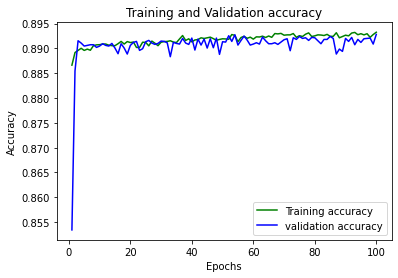

In [37]:
X_train_def, X_test_def, y_train_def, y_test_def = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train_def.shape)

network = models.Sequential()
network.add(layers.Dense(19, activation='softplus'))
network.add(layers.Dense(2, activation='softplus'))
network.compile(optimizer = optimizers.Adam(learning_rate=1.2e-2), loss='categorical_crossentropy', metrics=['accuracy'])

epocas = 100

y_train_binary = to_categorical(y_train_def, 2)
y_test_binary = to_categorical(y_test_def, 2)

history = network.fit(X_train_def, y_train_binary, validation_data=(X_test_def, y_test_binary), epochs=epocas, batch_size = 128)

loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,epocas+1)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

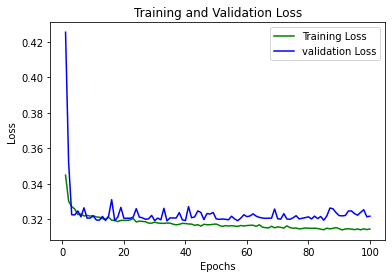

In [38]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,epocas+1)
plt.plot(epochs, loss_train, 'g', label='Training Loss')
plt.plot(epochs, loss_val, 'b', label='validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

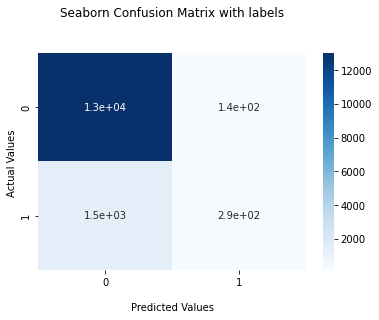

exact: 0.892828418230563  preci: 0.6682027649769585  sensi: 0.166189111747851  espec: 0.9890702087286527  PFP: 0.010929791271347248


In [60]:
y_proba = network.predict(X_test_def)
y_pred = []
for i in y_proba:
    if (i[0]>i[1]):
        y_pred.append(0)
    else:
        y_pred.append(1)

matriz_confusion = plotCM(y_test_def, y_pred, [0, 1], verbose=True)
exactitud = calculate_accuracy(matriz_confusion)
precision = calculate_precission(matriz_confusion)
sensibilidad = calculate_sensibility(matriz_confusion)
especificidad = calculate_specificity(matriz_confusion)
PFP = calculate_FPP(matriz_confusion)

print('exact:', exactitud, ' preci:', precision, ' sensi:', sensibilidad, ' espec:', especificidad, ' PFP:', PFP)

Epoch 1/100
55/55 [==============================] - 1s 7ms/step - loss: 0.7371 - accuracy: 0.5798 - val_loss: 0.6637 - val_accuracy: 0.6275
Epoch 2/100
55/55 [==============================] - 0s 4ms/step - loss: 0.6531 - accuracy: 0.6325 - val_loss: 0.6374 - val_accuracy: 0.6278
Epoch 3/100
55/55 [==============================] - 0s 4ms/step - loss: 0.6278 - accuracy: 0.6362 - val_loss: 0.6163 - val_accuracy: 0.6525
Epoch 4/100
55/55 [==============================] - 0s 4ms/step - loss: 0.6189 - accuracy: 0.6488 - val_loss: 0.6205 - val_accuracy: 0.6417
Epoch 5/100
55/55 [==============================] - 0s 4ms/step - loss: 0.6219 - accuracy: 0.6421 - val_loss: 0.6169 - val_accuracy: 0.6455
Epoch 6/100
55/55 [==============================] - 0s 4ms/step - loss: 0.6189 - accuracy: 0.6463 - val_loss: 0.6134 - val_accuracy: 0.6580
Epoch 7/100
55/55 [==============================] - 0s 4ms/step - loss: 0.6179 - accuracy: 0.6466 - val_loss: 0.6106 - val_accuracy: 0.6562
Epoch 8/100
5

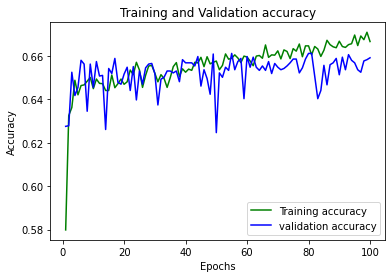

In [107]:
marketing_campaign_info_copy2 = marketing_campaign_info_copy

train = resample(marketing_campaign_info_copy2, replace=True, n_samples=(marketing_campaign_info_copy2.shape[0]))
test = marketing_campaign_info_copy2[~marketing_campaign_info_copy2.index.isin(train.index)]

train_no = train[train['y'] == 0]

train_si = train[train['y'] == 1]
train_no_concat = train_no.iloc[0 : train_si.shape[0]]

df_def = pd.concat([train_si, train_no_concat], axis=0)


#---------------------------------------------------------

X2 = df_def.loc[:, df_def.columns != 'y']
y2 = df_def.iloc[:, df_def.columns == 'y']

X_train_def2, X_test_def2, y_train_def2, y_test_def2 = train_test_split(X2, y2, test_size=0.33, random_state=42)

network2 = models.Sequential()
network2.add(layers.Dense(19, activation='softplus'))
network2.add(layers.Dense(2, activation='softplus'))
network2.compile(optimizer = optimizers.Adam(learning_rate=1.2e-2), loss='categorical_crossentropy', metrics=['accuracy'])

epocas = 100

y_train_binary2 = to_categorical(y_train_def2, 2)
y_test_binary2 = to_categorical(y_test_def2, 2)

history2 = network2.fit(X_train_def2, y_train_binary2, validation_data=(X_test_def2, y_test_binary2), epochs=epocas, batch_size = 128)

loss_train2 = history2.history['accuracy']
loss_val2 = history2.history['val_accuracy']
epochs = range(1,epocas+1)
plt.plot(epochs, loss_train2, 'g', label='Training accuracy')
plt.plot(epochs, loss_val2, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

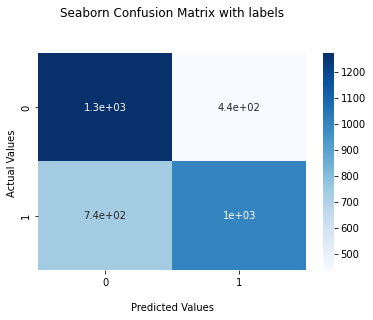

exact: 0.6591304347826087  preci: 0.6963168867268936  sensi: 0.575531303848363  espec: 0.7442949093036864  PFP: 0.25570509069631364


In [108]:
y_proba2 = network2.predict(X_test_def2)
y_pred2 = []
for i in y_proba2:
    if (i[0]>i[1]):
        y_pred2.append(0)
    else:
        y_pred2.append(1)

matriz_confusion2 = plotCM(y_test_def2, y_pred2, [0, 1], verbose=True)
exactitud2 = calculate_accuracy(matriz_confusion2)
precision2 = calculate_precission(matriz_confusion2)
sensibilidad2 = calculate_sensibility(matriz_confusion2)
especificidad2 = calculate_specificity(matriz_confusion2)
PFP2 = calculate_FPP(matriz_confusion2)

print('exact:', exactitud2, ' preci:', precision2, ' sensi:', sensibilidad2, ' espec:', especificidad2, ' PFP:', PFP2)

In [36]:
kmeans_model_def = KMeans(n_clusters=2, random_state=10)
kmeans_model_def.fit(X_train_def)

print(y_train_def)


matriz_confusion_def = plotCM_class(kmeans_model_def, X_test_def, y_test_def, 1.0, True)
exactitud = calculate_accuracy(matriz_confusion_def)
precision = calculate_precission(matriz_confusion_def)
sensibilidad = calculate_sensibility(matriz_confusion_def)
especificidad = calculate_specificity(matriz_confusion_def)
PFP = calculate_FPP(matriz_confusion_def)

print('exact:', exactitud, ' preci:', precision, ' sensi:', sensibilidad, ' espec:', especificidad, ' PFP:', PFP)

         y
41031  0.0
41950  0.0
39883  0.0
44938  0.0
42103  0.0
...    ...
11284  1.0
44732  0.0
38158  0.0
860    0.0
15795  0.0

[30291 rows x 1 columns]


KeyboardInterrupt: ignored

In [ ]:
predic = pd.DataFrame(kmeans_model_def.predict(X_test_def)).set_index(X_test_def.index)
dataset_def = pd.concat([X_test_def, predic], axis=1)
dataset_def

In [ ]:
cluster = dataset_def[dataset_def[0]==3]
cluster

In [ ]:
cluster = dataset_def[dataset_def[0]==0]
plot_stackedbar_chart(cluster, 'age', 'retired', True)

In [ ]:
dataset_def2 = pd.concat([dataset_def, y_test_def], axis=1)
dataset_def2

In [ ]:
cluster2 = dataset_def2[dataset_def2[0]==0]
plot_stackedbar_chart(cluster2, 'housing', 'y', False)